In [1]:
#imports all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\.conda\envs\panadas-tutorial\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('temp.csv')
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [3]:
df = df.rename(columns={'Daily minimum temperatures': 'Temperature'})

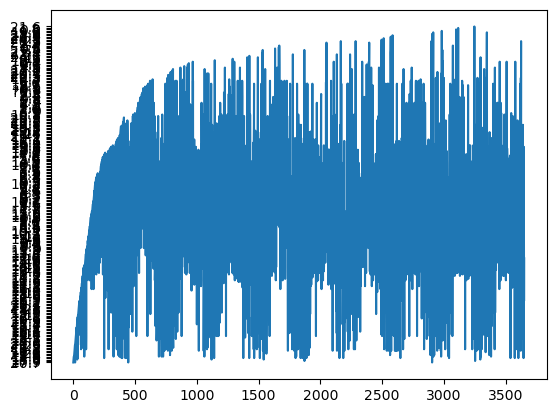

In [4]:
plt.plot(df['Temperature'])
plt.show()

In [5]:
# Replace non-numeric values with NaN
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df = df.interpolate(method='linear', axis=0)
df['Temperature'] = df['Temperature'].astype(float)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3650 non-null   datetime64[ns]
 1   Temperature  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [8]:
# perform first-order differencing to make it stationary
df['diff_1'] = df['Temperature'].diff()

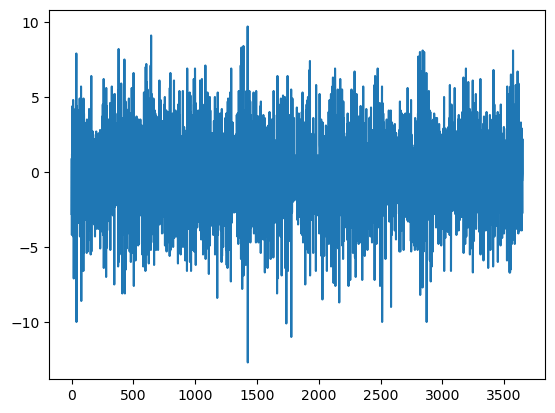

In [9]:
plt.plot(df['diff_1'])
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Temperature'])

# Print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.440522006557913
p-value: 0.00025147236020337557
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [11]:
df

,Date,Temperature,diff_1
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,-2.8
2,1981-01-03,18.8,0.9
3,1981-01-04,14.6,-4.2
4,1981-01-05,15.8,1.2
...,...,...,...
3645,1990-12-27,14.0,-0.6
3646,1990-12-28,13.6,-0.4
3647,1990-12-29,13.5,-0.1
3648,1990-12-30,15.7,2.2


In [12]:
mean=df['diff_1'].mean()

In [13]:
df=df.fillna(mean)

In [14]:
df

,Date,Temperature,diff_1
0,1981-01-01,20.7,-0.00211
1,1981-01-02,17.9,-2.80000
2,1981-01-03,18.8,0.90000
3,1981-01-04,14.6,-4.20000
4,1981-01-05,15.8,1.20000
...,...,...,...
3645,1990-12-27,14.0,-0.60000
3646,1990-12-28,13.6,-0.40000
3647,1990-12-29,13.5,-0.10000
3648,1990-12-30,15.7,2.20000


In [15]:
retrive=[]
retrive=df['Temperature']
df['retrive']=retrive
df

,Date,Temperature,diff_1,retrive
0,1981-01-01,20.7,-0.00211,20.7
1,1981-01-02,17.9,-2.80000,17.9
2,1981-01-03,18.8,0.90000,18.8
3,1981-01-04,14.6,-4.20000,14.6
4,1981-01-05,15.8,1.20000,15.8
...,...,...,...,...
3645,1990-12-27,14.0,-0.60000,14.0
3646,1990-12-28,13.6,-0.40000,13.6
3647,1990-12-29,13.5,-0.10000,13.5
3648,1990-12-30,15.7,2.20000,15.7


In [16]:
df = df.rename(columns={'diff_1': 'realValue'})

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['value2']=scaler.fit_transform(df[['realValue']])

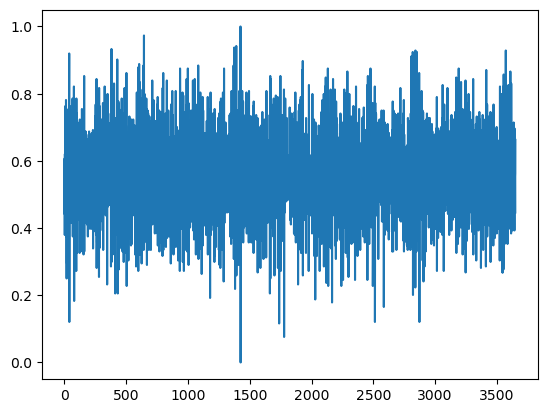

In [18]:
plt.plot(df['value2'])
plt.show()

In [19]:
r_d=scaler.inverse_transform(np.array(df['value2']).reshape(-1,1))

r_d

array([[-2.11016717e-03],
       [-2.80000000e+00],
       [ 9.00000000e-01],
       ...,
       [-1.00000000e-01],
       [ 2.20000000e+00],
       [-2.70000000e+00]])

In [20]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.python.keras.layers import LSTM

In [21]:
# let us build this function

def split_sequence(sequence,steps):
    x,y=list(),list()
    for start in range(len(sequence)):
        end_index=start+steps
        if end_index > len(sequence)-1:
            break;
        sequence_x,sequence_y=sequence[start:end_index],sequence[end_index]
        x.append(sequence_x)
        y.append(sequence_y)
    return array(x),array(y)

In [22]:
# now do the same for our original data & 3 month lag

d=df['value2'].tolist()

steps=10
x,y=split_sequence(d,steps)

In [23]:
#reshape 2d data to 3d to fit in cnn
features=1
x=x.reshape((x.shape[0],x.shape[1],features))

print(x.shape)

(3640, 10, 1)


In [24]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [25]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
# fit model

model.fit(x,y,epochs=700,verbose=0)

In [37]:
test_data_x= x[-900:]
test_data_y= y[-900:]

In [38]:
test_data_pred=model.predict(test_data_x)

29/29 [==============================] - 0s 6ms/step


In [39]:
test_data_pred.shape

(900, 1)

In [40]:
from sklearn.metrics import r2_score

r2_score(test_data_y,test_data_pred)

0.9927193185521377

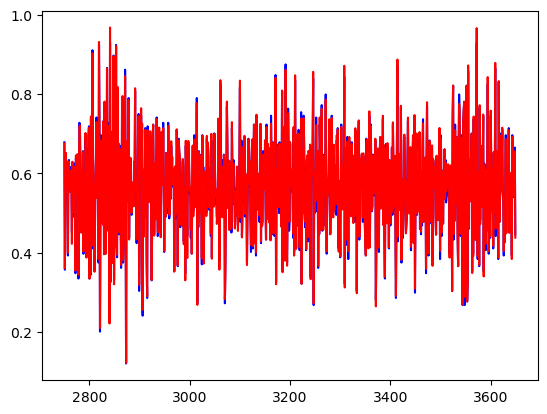

In [41]:
plt.plot(df.tail(900).index, test_data_y, color='blue')
plt.plot(df.tail(900).index, test_data_pred, color='red')
plt.show()

In [42]:
df.tail()

,Date,Temperature,realValue,retrive,value2
3645,1990-12-27,14.0,-0.6,14.0,0.540179
3646,1990-12-28,13.6,-0.4,13.6,0.549107
3647,1990-12-29,13.5,-0.1,13.5,0.562500
3648,1990-12-30,15.7,2.2,15.7,0.665179
3649,1990-12-31,13.0,-2.7,13.0,0.446429


In [49]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def increase_date(date_string):
    date_obj = datetime.strptime(date_string, "%Y-%m-%d")
    new_date_obj = date_obj + relativedelta(days=1)
    formatted_date = datetime.strftime(new_date_obj, "%Y-%m-%d")
    return formatted_date

start_date = '1990-12-31'
increased_date = increase_date(start_date)
print(increased_date)

1991-01-01


In [50]:
# forecasting 90 days future data

data=df['value2'].tolist()
forecasted_df=pd.DataFrame(columns=['Date','value2'])
start_date = '1990-12-31'

for i in range(90):
    new_date=increase_date(start_date)
    forecast_input=array(data[-10:])
    x_forecast=forecast_input.reshape(1,steps,features)
    forecasted_y=model.predict(x_forecast).item()
    #print(np.array(forecasted_y))
    #x=np.concatenate((x,np.array(x_forecast)))
    #y=np.concatenate((y,np.array([forecasted_y])))
    #model.fit(x,y,epochs=5,verbose=0)
    forecasted_df.at[i,'Date']=new_date
    forecasted_df.at[i,'value2']=forecasted_y
    data.append(forecasted_y)
    start_date=new_date

1/1 [==============================] - 0s 33ms/step


In [51]:
forecasted_df

,Date,value2
0,1991-01-01,0.416144
1,1991-01-02,0.773804
2,1991-01-03,0.551875
3,1991-01-04,0.338671
4,1991-01-05,0.514592
...,...,...
85,1991-03-27,0.670321
86,1991-03-28,0.498541
87,1991-03-29,0.699526
88,1991-03-30,0.497023


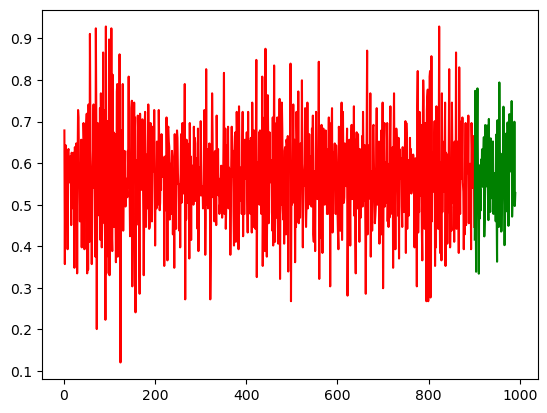

In [52]:
index_old=np.arange(1,901)
index_new=np.arange(901,991)

plt.plot(index_old, test_data_y, color='red')
plt.plot(index_new,forecasted_df['value2'], color='green')

In [53]:
forcasted_dif=scaler.inverse_transform(np.array(forecasted_df['value2']).reshape(-1,1))

In [54]:
dif_list=np.array(forcasted_dif).flatten().tolist()

dif_list

[-3.3783854484558105,
 4.633200454711915,
 -0.3379907608032223,
 -5.113778972625733,
 -1.173148727416992,
 2.4110321044921883,
 4.765561294555665,
 0.7773925781250005,
 -0.08434944152831997,
 -5.217374801635742,
 0.6196987152099613,
 -2.2448494911193846,
 -0.673652648925781,
 -1.8105865478515624,
 0.9336952209472661,
 -0.4001564025878903,
 1.4813606262207037,
 0.5690660476684575,
 -0.5411836624145505,
 1.0906734466552739,
 2.1372381210327154,
 -3.2088662147521974,
 -2.2189156532287595,
 2.7906642913818365,
 1.774315261840821,
 0.19708023071289102,
 -0.5138839721679684,
 2.7694622039794927,
 0.26168251037597695,
 -0.9889549255371092,
 -2.3316144943237305,
 3.118904113769532,
 -0.3992378234863278,
 0.231859397888184,
 -1.8924709320068358,
 2.074029731750489,
 0.15233688354492225,
 -1.149519348144531,
 1.4244915008544927,
 0.9800674438476568,
 1.9061393737792975,
 -1.9967857360839842,
 -0.9219654083251951,
 -0.20417327880859343,
 -0.29637165069580046,
 0.21645450592041054,
 -2.39347705841

In [60]:
last_value=df.tail(1)['Temperature'].iloc[0]

last_value

13.0

In [61]:
forecasted_og=[]

for i in range(len(dif_list)):
    n=last_value+dif_list[i]
    forecasted_og.append(n)
    last_value=n
    
forecasted_df['Retrive']=forecasted_og

In [62]:
forecasted_df

,Date,value2,Retrive
0,1991-01-01,0.416144,9.621615
1,1991-01-02,0.773804,14.254815
2,1991-01-03,0.551875,13.916824
3,1991-01-04,0.338671,8.803045
4,1991-01-05,0.514592,7.629897
...,...,...,...
85,1991-03-27,0.670321,13.829344
86,1991-03-28,0.498541,12.296656
87,1991-03-29,0.699526,15.266032
88,1991-03-30,0.497023,13.699347


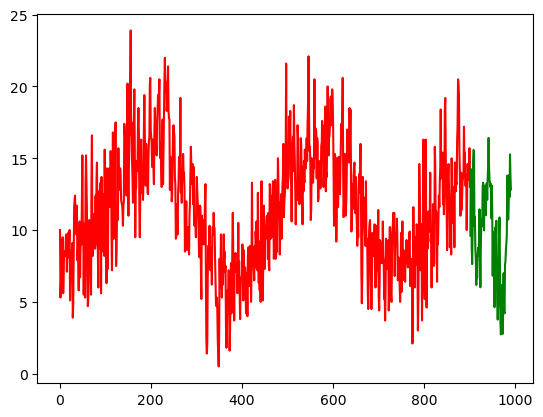

In [65]:
index_old=np.arange(1,901)
index_new=np.arange(901,991)

last_300 = df['Temperature'][-900:].tolist()

plt.plot(index_old, last_300, color='red')
plt.plot(index_new,forecasted_df['Retrive'], color='green')

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Save the model to a file
tf.keras.models.save_model(model, 'my_lstm_model')

INFO:tensorflow:Assets written to: my_lstm_model\assets


In [67]:
df.to_csv("last10Data.csv")

In [68]:
df


,Date,Temperature,realValue,retrive,value2
0,1981-01-01,20.7,-0.00211,20.7,0.566870
1,1981-01-02,17.9,-2.80000,17.9,0.441964
2,1981-01-03,18.8,0.90000,18.8,0.607143
3,1981-01-04,14.6,-4.20000,14.6,0.379464
4,1981-01-05,15.8,1.20000,15.8,0.620536
...,...,...,...,...,...
3645,1990-12-27,14.0,-0.60000,14.0,0.540179
3646,1990-12-28,13.6,-0.40000,13.6,0.549107
3647,1990-12-29,13.5,-0.10000,13.5,0.562500
3648,1990-12-30,15.7,2.20000,15.7,0.665179
